In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

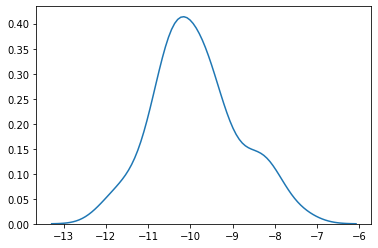

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0666: 100%|██████████| 1500/1500 [00:05<00:00, 272.56it/s]


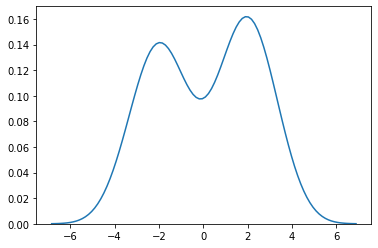

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([ 2.1590989 , -2.7190118 , -2.8412833 ,  1.1624349 ,
              1.0669168 ,  0.579518  ,  1.618029  , -2.1453671 ,
              1.6538349 , -2.464891  , -2.8927176 ,  1.8024836 ,
             -1.9682207 , -3.660656  , -3.1860235 , -1.2077961 ,
              0.6518974 , -0.87297404, -1.6987215 , -1.8737354 ,
             -1.2980844 ,  1.34657   , -2.0763319 ,  2.072836  ,
              3.206368  , -4.2016964 , -0.48749265,  1.4570105 ,
             -1.4404466 , -1.3920685 , -1.7034085 ,  2.3803642 ,
              2.1309407 ,  3.8013334 , -2.4503756 , -1.084977  ,
              0.9663188 , -1.7685509 , -2.1363688 ,  1.3846812 ,
              3.0373006 ,  1.22803   , -2.0131931 , -0.6581599 ,
              2.9216528 , -3.203695  , -1.6617677 , -2.8294566 ,
             -1.6694621 ,  1.9780432 ,  3.3716717 ,  1.9542062 ,
             -1.6845244 ,  3.6884427 ,  0.06784222,  4.2436023 ,
             -2.2992282 ,  0.7990468 ,  2.7355208 , -3.1923687 ,
              2.5910454 ,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.LinearKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.283: 100%|██████████| 1500/1500 [00:03<00:00, 487.88it/s]


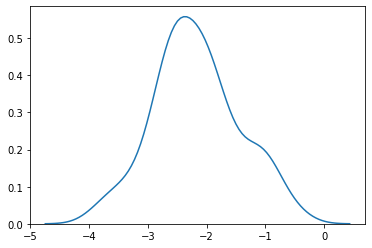

In [10]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [11]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RandomFeatureKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations * 2)

SVGD 2.0116: 100%|██████████| 3000/3000 [00:21<00:00, 136.84it/s]


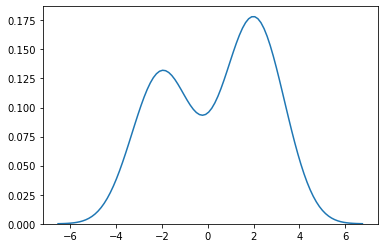

In [12]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [13]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.IMQKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0786: 100%|██████████| 1500/1500 [00:03<00:00, 472.95it/s]


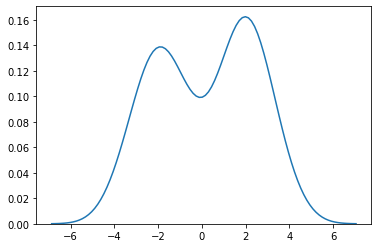

In [14]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [15]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.MixtureKernel([0.5, 0.5], [kernels.LinearKernel(), kernels.RandomFeatureKernel()]), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.3253: 100%|██████████| 1500/1500 [00:11<00:00, 133.53it/s]


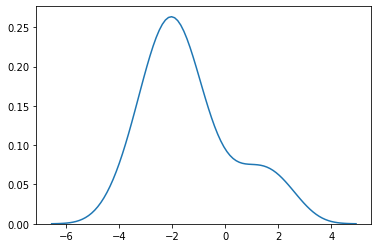

In [16]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])